In [2]:
import pandas as pd  
import pandas_profiling
from methodes import wordFromCSV, wordFromDF

In [7]:
df = wordFromCSV('sample.csv', 'ken lay')
#df = wordFromDF(df, 'lay')
print("Le fichier a " + str(df.shape[0]) + " lignes et " + str(df.shape[1]) + " colonnes")
profile = pandas_profiling.ProfileReport(df)
profile.to_file("report.html")
profile.to_notebook_iframe()

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 125.35it/s]


In [67]:
# import numpy as np
# import sklearn.cluster
# import distance

# words = df["Body"] #Replace this line
# words = np.asarray(words) #So that indexing with a list will work
# lev_similarity = -1*np.array([[distance.levenshtein(w1,w2) for w1 in words] for w2 in words])


# affprop = sklearn.cluster.AffinityPropagation(affinity="precomputed", damping=0.5)
# affprop.fit(lev_similarity)
# for cluster_id in np.unique(affprop.labels_):
#     exemplar = words[affprop.cluster_centers_indices_[cluster_id]]
#     cluster = np.unique(words[np.nonzero(affprop.labels_==cluster_id)])
#     cluster_str = ", ".join(cluster)
#     print(" - *%s:* %s" % (exemplar, cluster_str))

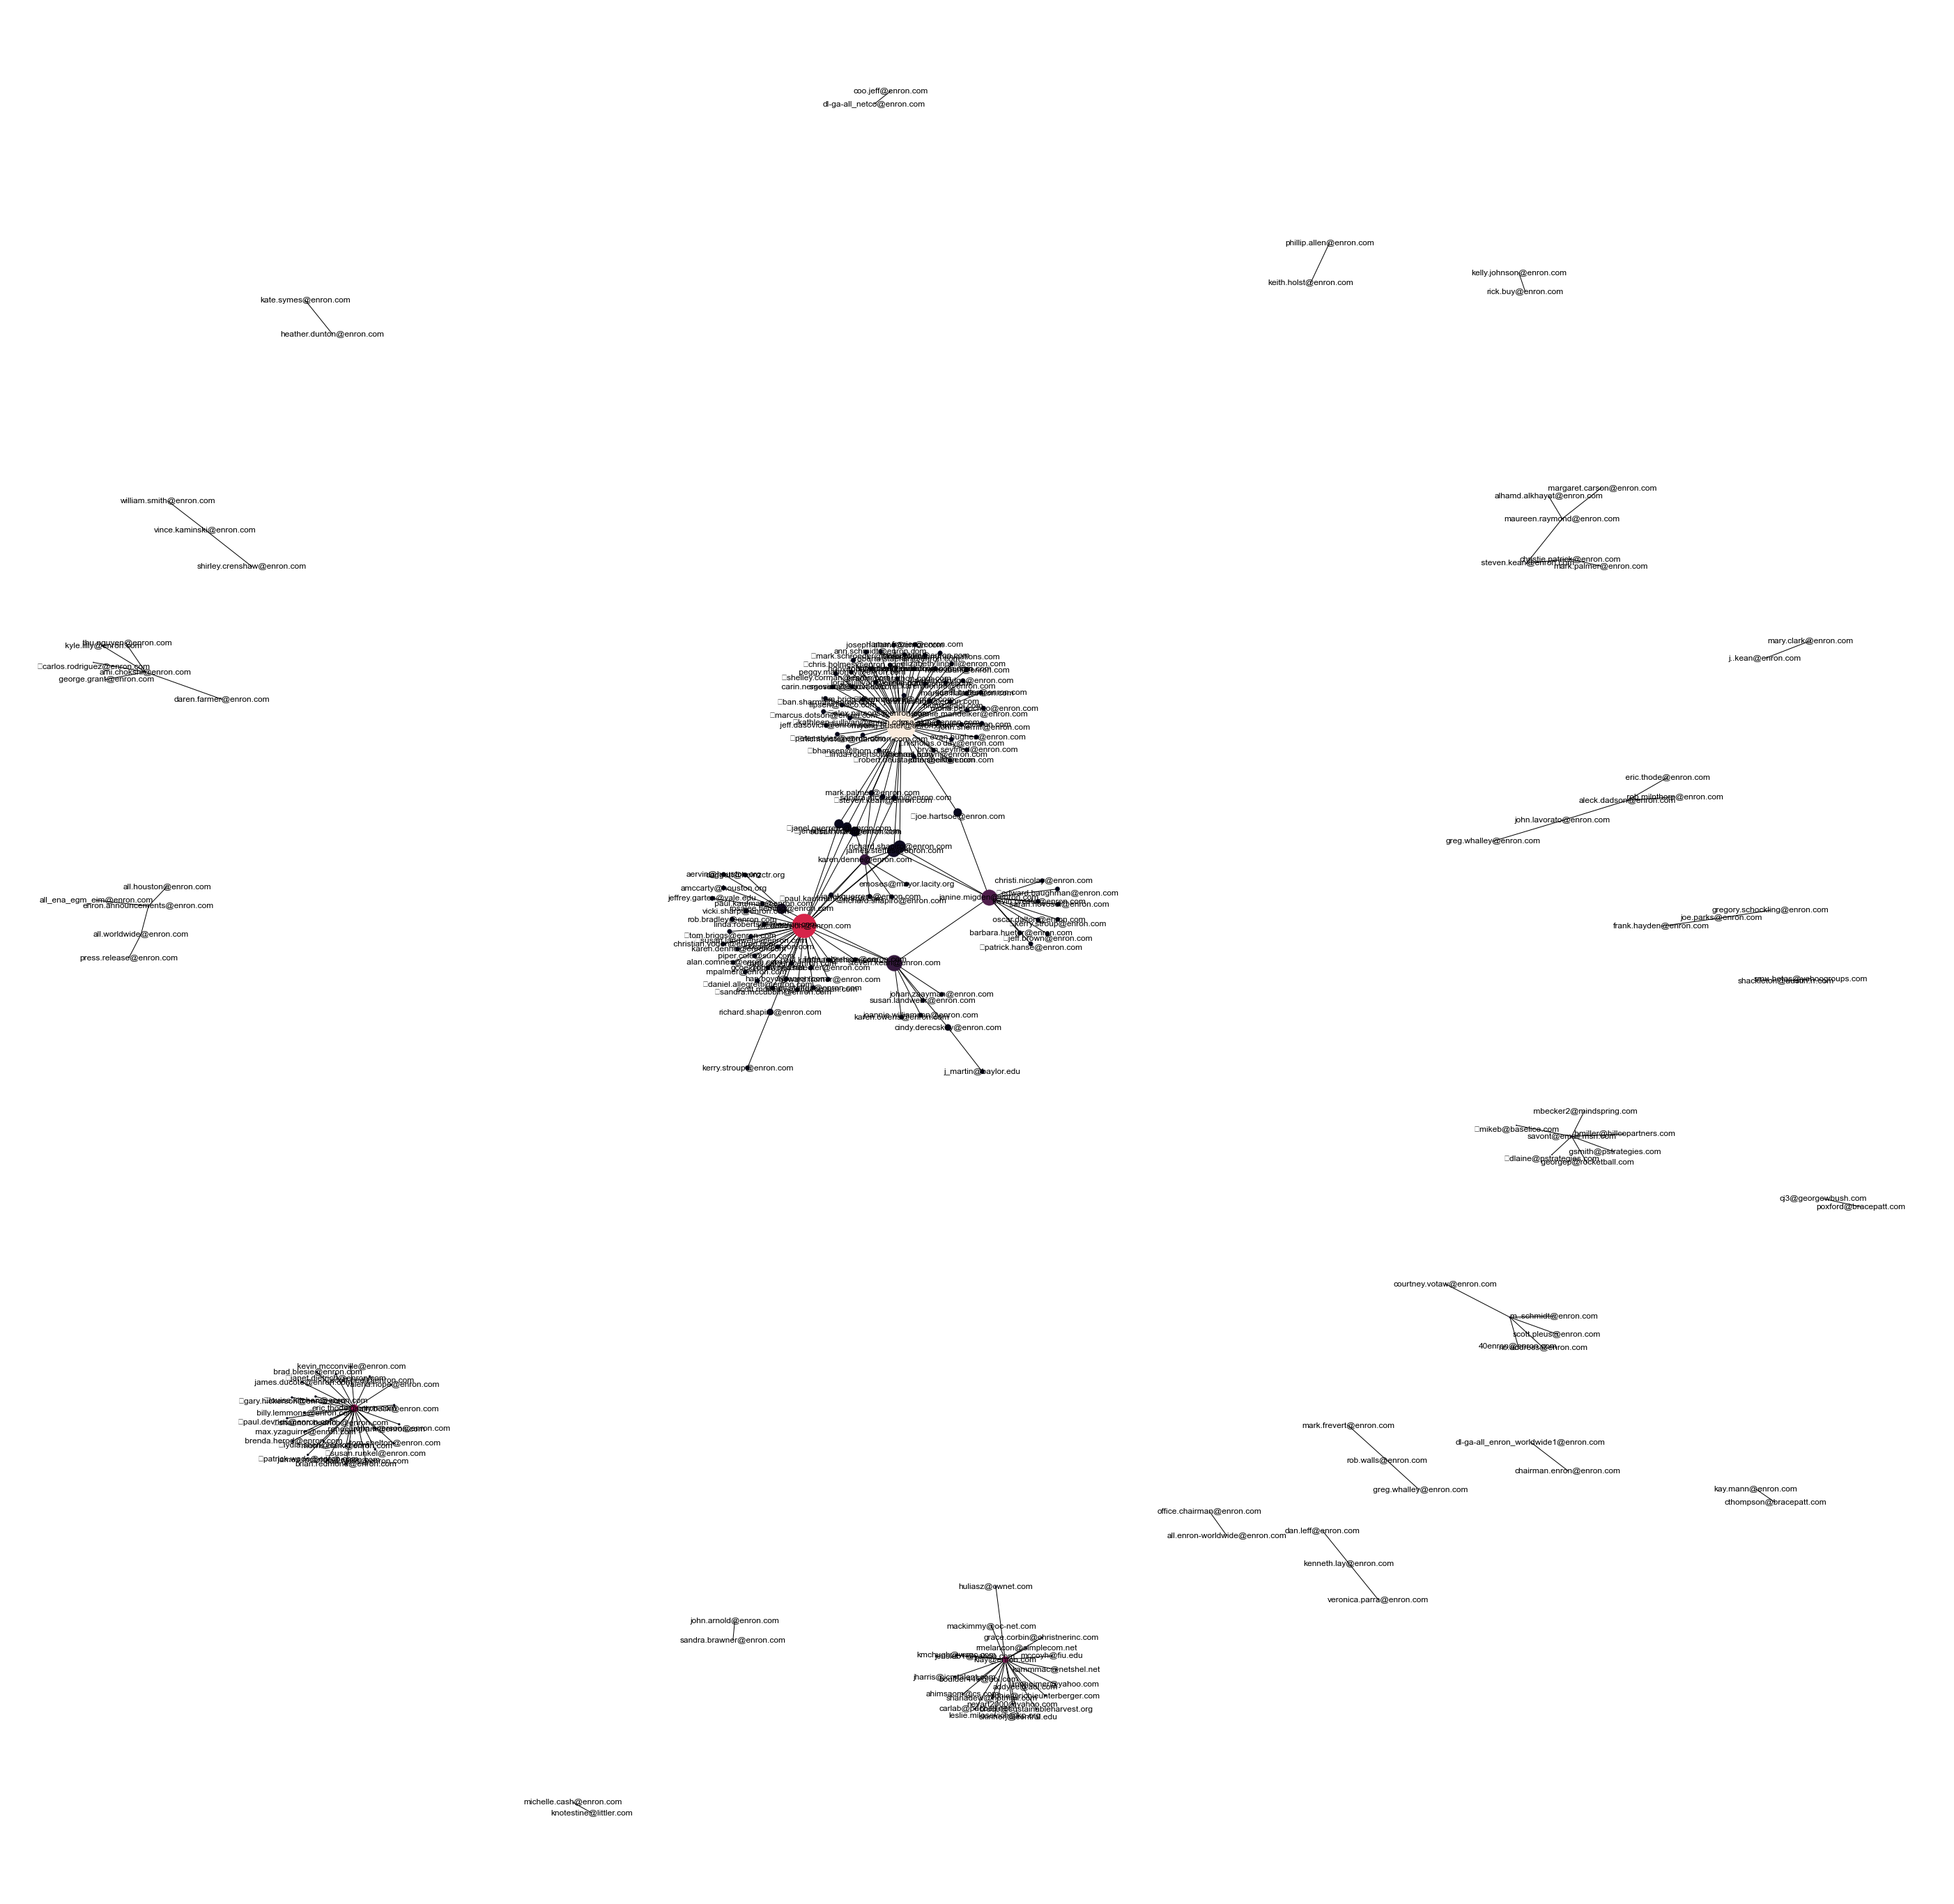

In [63]:
import networkx as nx
import matplotlib.pyplot as plt

#Create the graph
G_symmetric = nx.Graph()

for index, mail in df.iterrows():
# for mail in df:
    # print(df["To"])
    mail_to=mail[2].split(sep=",")

    for adress in mail_to:
        # --- Tester si le node existe et si il existe ajouter +1 au weight
        G_symmetric.add_edge(mail[1],adress,weight=1)



# #Space the nodes for clarity
# nx.spring_layout(G_asymmetric)
# # Draw the graph
# nx.draw_networkx(G_asymmetric)


#-----WTF.
pos = nx.spring_layout(G_symmetric)
betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)
node_color = [20000.0 * G_symmetric.degree(v) for v in G_symmetric]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(50, 50))
nx.draw_networkx(G_symmetric, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
#plt.axis('off')

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

df2 = wordFromCSV('emails.csv', 'energy')
pandas_profiling.ProfileReport(df2)

#Create the graph
G_symmetric = nx.Graph()

for index, mail in df2.iterrows():
    mail_to=mail[2].split(sep=",")

    for adress in mail_to:
        G_symmetric.add_edge(mail[1],adress,weight=1)


pos = nx.spring_layout(G_symmetric)
betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)
node_color = [20000.0 * G_symmetric.degree(v) for v in G_symmetric]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(100, 100))
nx.draw_networkx(G_symmetric, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
#plt.axis('off')